In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

no_SMOTE = pd.read_csv('data/final_predictions_noSMOTE.csv')
yes_SMOTE = pd.read_csv('final_predictions_last.csv')
tweets = pd.read_excel('data/final_tweets.xlsx')

no_SMOTE = no_SMOTE.drop(['Unnamed: 0'], axis = 1)
yes_SMOTE = yes_SMOTE.drop(['Unnamed: 0'], axis = 1)
tweets = tweets.drop(['Unnamed: 0'], axis = 1)

In [28]:
def find_percent(col, name):
    count = len(pd.Series(col)[col == 'bot'])
    length = len(pd.Series(col)[col == 'bot']) + len(pd.Series(col)[col == 'human'])
    return count / length

In [29]:
for (first_name, first_col), (fifth_name, fifth_col) in zip(yes_SMOTE.iteritems(), no_SMOTE.iteritems()):
    print('With SMOTE applied to dataset', first_name + ":", find_percent(first_col, first_name))
    print('  No SMOTE applied to dataset', fifth_name + ":", find_percent(fifth_col, fifth_name))

With SMOTE applied to dataset One Congress, Boston: 0.23880597014925373
  No SMOTE applied to dataset One Congress, Boston: 0.14427860696517414
With SMOTE applied to dataset Transbay: 0.1913329464112981
  No SMOTE applied to dataset Transbay: 0.13051044083526683
With SMOTE applied to dataset SoFi Stadium: 0.34023285899094435
  No SMOTE applied to dataset SoFi Stadium: 0.24129032258064517
With SMOTE applied to dataset Treasure Island: 0.2962264150943396
  No SMOTE applied to dataset Treasure Island: 0.18975808985234055
With SMOTE applied to dataset Port Covington: 0.22075557578516158
  No SMOTE applied to dataset Port Covington: 0.15475648611743287
With SMOTE applied to dataset Parkmerced: 0.272108843537415
  No SMOTE applied to dataset Parkmerced: 0.15419501133786848
With SMOTE applied to dataset Belmont Park: 0.23924268502581755
  No SMOTE applied to dataset Belmont Park: 0.14556416881998277
With SMOTE applied to dataset Lincoln Yards: 0.20812437311935808
  No SMOTE applied to dataset

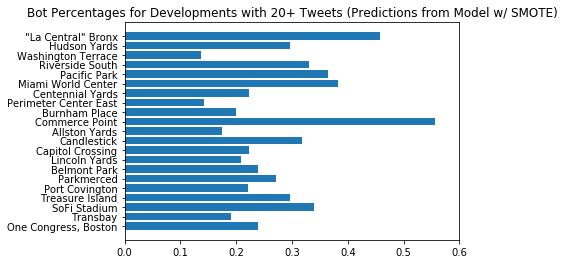

In [34]:
results = []
new_res = pd.DataFrame()
for name, col in yes_SMOTE.iteritems():
    if len(pd.Series(col)[col == 'bot']) + len(pd.Series(col)[col == 'human']) > 20:
        new_res[name] = col
for name, column in new_res.iteritems():
    results.append(find_percent(column, name))

plt.barh(y = new_res.columns, width = results, linewidth = 50)
plt.rcParams.update({'font.size': 10})
plt.xlim(0, .6)
plt.title('Bot Percentages for Developments with 20+ Tweets (Predictions from Model w/ SMOTE)')
plt.show()

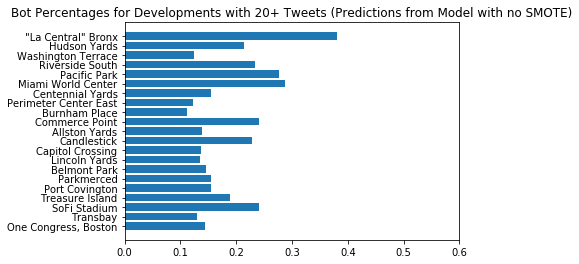

In [35]:
results = []
new_res = pd.DataFrame()
for name, col in no_SMOTE.iteritems():
    if len(pd.Series(col)[col == 'bot']) + len(pd.Series(col)[col == 'human']) > 20:
        new_res[name] = col
for name, column in new_res.iteritems():
    results.append(find_percent(column, name))

plt.barh(y = new_res.columns, width = results, linewidth = 50)
plt.rcParams.update({'font.size': 10})
plt.xlim(0, .6)
plt.title('Bot Percentages for Developments with 20+ Tweets (Predictions from Model with no SMOTE)')
plt.show()

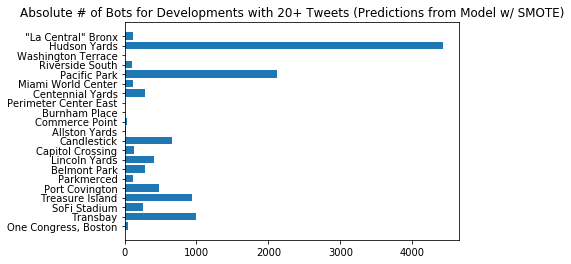

In [38]:
results = []
new_res = pd.DataFrame()
for name, col in yes_SMOTE.iteritems():
    if len(pd.Series(col)[col == 'bot']) + len(pd.Series(col)[col == 'human']) > 20:
        new_res[name] = col
for name, column in new_res.iteritems():
    results.append(len(pd.Series(column)[column == 'bot']))

plt.barh(y = new_res.columns, width = results, linewidth = 50)
plt.rcParams.update({'font.size': 10})
plt.title('Absolute # of Bots for Developments with 20+ Tweets (Predictions from Model w/ SMOTE)')
plt.show()

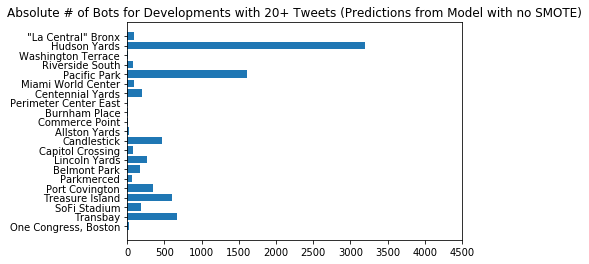

In [37]:
results = []
new_res = pd.DataFrame()
for name, col in no_SMOTE.iteritems():
    if len(pd.Series(col)[col == 'bot']) + len(pd.Series(col)[col == 'human']) > 20:
        new_res[name] = col
for name, column in new_res.iteritems():
    results.append(len(pd.Series(column)[column == 'bot']))

plt.barh(y = new_res.columns, width = results, linewidth = 50)
plt.rcParams.update({'font.size': 10})
plt.xlim(0, 4500)
plt.title('Absolute # of Bots for Developments with 20+ Tweets (Predictions from Model with no SMOTE)')
plt.show()